# Machine learning tests with predetermined measurements are run here
This notebook shows several experiments on the palsy dataset, using different types of machine learning algorithms.

The first code blocks always have to be run, the reset (all experiments) can be run individually when interested in a certain algorithm type.

## Imports and definitions
Mandatory section.

We start with importing some necessary packages and defning the function(s) used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def print_confusion_matrix(matrix):
    print("    p  c  h")
    print('p',matrix[0])
    print('c',matrix[1])
    print('h',matrix[2])


## Make the dataset
Mandatory section.

Here, we make the dataset that we will use.

In [2]:
# dataset settings:
full_features = True

# load the features
x_train = np.load('ratio_dataset.npy',allow_pickle=True)
# x_train = x_train.tolist()
# x_train = np.delete(x_train,102,0) # remove the one broken datapoint
x_train = np.delete(x_train,9,1)

# load the corresponding labels
y_train = np.load('labels.npy')
y_train = np.delete(y_train,102,0) # remove the one broken datapoint

# (potentially) discard some data
if not full_features: 
    # leave out the chin landmarks for more significant data
    x_train = x_train[:,34:]

# define class names for use in printing predictions
classes = {0:'peripheral palsy', 1:'central palsy', 2:'healthy'}
count_classes = np.bincount(y_train)

# print the size of the dataset
print("**Dataset summary**")
print("(datapoints, features) =", x_train.shape)
print(count_classes[0], classes[0])
print(count_classes[1], classes[1])
print(count_classes[2], classes[2])

**Dataset summary**
(datapoints, features) = (202, 52)
102 peripheral palsy
40 central palsy
60 healthy


## Model 1
Optional section.

This is the first experiment. 
A DNN is made with many different amounts of hidden layers and nodes. 
The final accuracy is printed using LOOCV.

In [ ]:
# source: adapted from https://www.freecodecamp.org/learn/machine-learning-with-python/

# results: not-much-better-than-guessing accuracy. probably not enough datapoints available.

# imports:
import tensorflow as tf

# use leave-one-out cross-validation to test the accuracy of the model
correct = 0
n = len(y_train)
for i in range(len(y_train)):
    # print("Run", i+1, "of", len(dftrain))
    x_test = x_train[i]
    x_test = np.reshape(x_test, (1,-1))
    y_test = y_train[i]
    x_train_loocv = np.delete(x_train, i, 0)
    y_train_loocv = np.delete(y_train, i, 0)
    model1 = tf.keras.Sequential([
        # tf.keras.layers.Dense(136, activation='relu'),
        tf.keras.layers.Dense(108800, activation='relu'),
        # tf.keras.layers.Dense(10880, activation='relu'),
        tf.keras.layers.Dense(3, activation='sigmoid'),
    ])

    model1.compile(
        optimizer = tf.keras.optimizers.Adam(),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics = tf.keras.metrics.CategoricalAccuracy(),
    )
    model1.fit(x_train_loocv, y_train_loocv, epochs=1, verbose=0, batch_size=len(x_train_loocv), shuffle=True)
    prediction = np.argmax(model1.predict(x_test))
    # print("Prediction:", classes[prediction.astype(int)])
    # print("Actual:    ", classes[y_test.astype(int)])
    if (prediction == y_test):
        correct += 1
print("accuracy =", correct/n)

## Model 2
Optional section.

This is the second experiment. A support vector machine (SVM) will be built.

In [10]:
# source: adapted from https://scikit-learn.org/stable/modules/svm.html#svm-classification

# imports:
from sklearn import svm

# model settings:
kernel = 'poly'
degree = 20
# weights = {0:0.5, 1:10.0, 2:1.5}
weights = 'balanced'


In [11]:
# single run

# results: (using kernel='poly', degree=5, weights={0:0.5,10:1.,2:1.5})
    # accuracy = 0.604

# use leave-one-out cross-validation to test the accuracy of the model
correct = 0
confusion_matrix = [[0,0,0], [0,0,0], [0,0,0]]
n = len(y_train)
for i in range(len(y_train)):
    x_test = x_train[i]
    x_test = np.reshape(x_test, ([1,-1]))
    y_test = y_train[i]
    x_train_loocv = np.delete(x_train, i, 0)
    y_train_loocv = np.delete(y_train, i, 0)
    model2 = svm.SVC(kernel=kernel,degree=degree,class_weight=weights)
    model2.fit(x_train_loocv, y_train_loocv)
    prediction = model2.predict(x_test)
    if (prediction == y_test):
        correct += 1
    confusion_matrix[prediction[0]][y_test] += 1
print("accuracy =", correct/n)
print_confusion_matrix(confusion_matrix)



accuracy = 0.6039603960396039
    p  c  h
p [52, 9, 0]
c [35, 19, 9]
h [15, 12, 51]


## Model 3
Optional section.

This is the third experiment. 
This model uses a K-nearest neighbors (KNN) algorithm to classify the data.

In [ ]:
# source: adated from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

# results: (using n_neighbors=5, weight='distance')
    # accuracy = .589

# imports:
from sklearn import neighbors

# model settings:
n_neighbors = 5
weight = 'distance'

# use leave-one-out cross-validation to test the accuracy of the model
correct = 0
confusion_matrix = [[0,0,0], [0,0,0], [0,0,0]]
n = len(y_train)
for i in range(len(y_train)):
    x_test = x_train[i]
    x_test = np.reshape(x_test, ([1,-1]))
    y_test = y_train[i]
    x_train_loocv = np.delete(x_train, i, 0)
    y_train_loocv = np.delete(y_train, i, 0)
    model3 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight)
    model3.fit(x_train_loocv, y_train_loocv)
    prediction = model3.predict(x_test)
    if (prediction == y_test):
        correct += 1
    confusion_matrix[prediction[0]][y_test] += 1
print("accuracy =", correct/n)
print_confusion_matrix(confusion_matrix)

## Model 4
Optional section.

This is the fourth experiment. 
A Random Forest classification system is used.

In [15]:
# source: adapted from https://scikit-learn.org/stable/modules/ensemble.html#forest

# imports:
from sklearn import ensemble

# model settings:
n_estimators = 100


In [ ]:
# single run

# results: (using n_estimators=100)
    # accuracy = 0.851

# use leave-one-out cross-validation to test the accuracy of the model
correct = 0
confusion_matrix = [[0,0,0], [0,0,0], [0,0,0]]
n = len(y_train)
for i in range(len(y_train)):
    x_test = x_train[i]
    x_test = np.reshape(x_test, ([1,-1]))
    y_test = y_train[i]
    x_train_loocv = np.delete(x_train, i, 0)
    y_train_loocv = np.delete(y_train, i, 0)
    model4 = ensemble.RandomForestClassifier(n_estimators,n_jobs=8)
    model4.fit(x_train_loocv, y_train_loocv)
    prediction = model4.predict(x_test)
    if (prediction == y_test):
        correct += 1
    confusion_matrix[prediction[0]][y_test] += 1
print("accuracy =", correct/n)
print_confusion_matrix(confusion_matrix)


In [ ]:
# multiple runs

# results: 0.85 from about n=75

# settings:
runs = 200
savestate_present = False
filename_savestate = 'accuracy_randomforest_measurements.npy'

# restore from savestate or make new array
if (savestate_present):
    accuracy = np.load(filename_savestate)
    accuracy = accuracy.tolist()
else:
    accuracy = []

for n_estimators in range(len(accuracy)+1, runs):
    # use leave-one-out cross-validation to test the accuracy of the model
    print("Run",n_estimators,"of",runs)
    correct = 0
    n = len(y_train)
    for i in range(len(y_train)):
        x_test = x_train[i]
        x_test = np.reshape(x_test, ([1,-1]))
        y_test = y_train[i]
        x_train_loocv = np.delete(x_train, i, 0)
        y_train_loocv = np.delete(y_train, i, 0)
        model4 = ensemble.RandomForestClassifier(n_estimators, n_jobs=8)
        model4.fit(x_train_loocv, y_train_loocv)
        prediction = model4.predict(x_test)
        if (prediction == y_test):
            correct += 1
    print("accuracy:",correct/n)
    accuracy.append(correct/n)

    # save state for later continuance
    np.save(filename_savestate, accuracy)


Text(0, 0.5, 'Testing Accuracy')

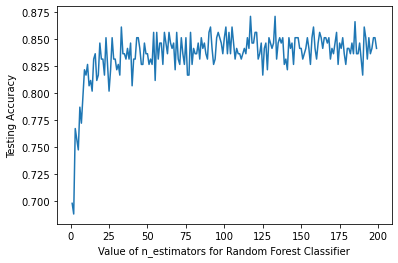

In [3]:
filename_savestate = 'accuracy_randomforest_measurements.npy'
accuracy = np.load(filename_savestate)
plt.plot(range(1,len(accuracy)+1), accuracy)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

## Model 5
Optional section.

This is the fifth experiment. 
A Gaussian Naive Bayes model is built here.

In [ ]:
# source: adapted from https://scikit-learn.org/stable/modules/naive_bayes.html

# results: (no specific settings for this model)
    # accuracy = 0.807

# imports:
from sklearn import naive_bayes

# model settings:

# use leave-one-out cross-validation to test the accuracy of the model
correct = 0
confusion_matrix = [[0,0,0], [0,0,0], [0,0,0]]
n = len(y_train)
for i in range(len(y_train)):
    x_test = x_train[i]
    x_test = np.reshape(x_test, ([1,-1]))
    y_test = y_train[i]
    x_train_loocv = np.delete(x_train, i, 0)
    y_train_loocv = np.delete(y_train, i, 0)
    model5 = naive_bayes.GaussianNB()
    model5.fit(x_train_loocv, y_train_loocv)
    prediction = model5.predict(x_test)
    if (prediction == y_test):
        correct += 1
    confusion_matrix[prediction[0]][y_test] += 1
print("accuracy =", correct/n)
print_confusion_matrix(confusion_matrix)

## Model 6
Optional section.

This is the sixth experiment. 
A decision tree is used in the following code block.

In [ ]:
# source: adapted from https://scikit-learn.org/stable/modules/tree.html#classification

# results: (using depth=10)
    # accuracy = 0.708

# imports:
from sklearn import tree

# model settings:
depth = 10

# use leave-one-out cross-validation to test the accuracy of the model
correct = 0
confusion_matrix = [[0,0,0], [0,0,0], [0,0,0]]
n = len(y_train)
for i in range(len(y_train)):
    x_test = x_train[i]
    x_test = np.reshape(x_test, ([1,-1]))
    y_test = y_train[i]
    x_train_loocv = np.delete(x_train, i, 0)
    y_train_loocv = np.delete(y_train, i, 0)
    model6 = tree.DecisionTreeClassifier(max_depth=depth)
    model6.fit(x_train_loocv, y_train_loocv)
    prediction = model6.predict(x_test)
    if (prediction == y_test):
        correct += 1
    confusion_matrix[prediction[0]][y_test] += 1
print("Final accuracy =", correct/n)
print_confusion_matrix(confusion_matrix)